# Regressão Linear


<center>
<img src="https://www.edsonmelo.com.br/dados_csv/images/reg-linear1.png" alt="reg-linear" style="width: 400px;"/>
</center>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Criando um DataFrame (Horas de Estudo versus Nota Obtida)
df = pd.DataFrame()

# Horas de Estudo
df['x'] = [5.1, 5.5, 5.9, 6.5, 6.8, 7.6, 8.3, 8.5, 9.1, 9.5]

# Nota Obtida
df['y'] = [2.0, 2.9, 4.0, 5.9, 6.0, 6.9, 8.0, 9.0, 9.9, 10.0]

x_values = df[['x']] # Entrada
y_values = df[['y']] # Saída

In [ ]:
# x_values
# y_values

In [ ]:
df.head()

,x,y
0,5.1,2.0
1,5.5,2.9
2,5.9,4.0
3,6.5,5.9
4,6.8,6.0


In [ ]:
df.describe()

,x,y
count,10.000000,10.000000
mean,7.280000,6.460000
std,1.546897,2.838701
min,5.100000,2.000000
25%,6.050000,4.475000
50%,7.200000,6.450000
75%,8.450000,8.750000
max,9.500000,10.000000


# Modelo de Regrssão Linear Simples

_O que queremos?_

Qual o número de horas que um aluno obtenha uma nota boa?

In [ ]:
# Treinando o nosso modelo de dados (Linear Regression)
modelo = linear_model.LinearRegression()
modelo.fit(x_values, y_values)

LinearRegression()

In [ ]:
# Coeficiente da reta
# y = ax + b

# Coeficiente da inclinação da linha de tendência (a)
print(round(modelo.coef_[0][0], 2))

# Ponto onde a linha de tendência atinge o eixo "y"
print(round(modelo.intercept_[0], 2))

1.81
-6.74


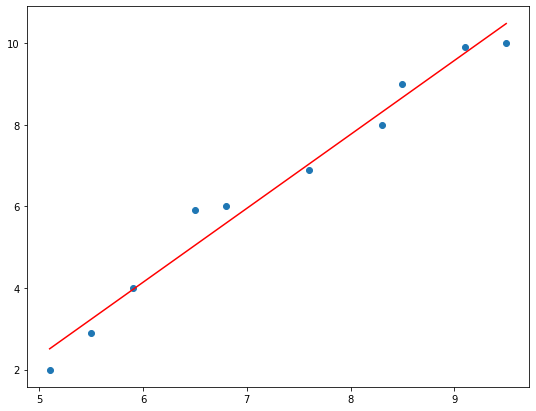

In [ ]:
# Plotar um gráfico dos nossos dados
plt.figure(1, figsize=(9,7))
plt.scatter(df.x, df.y)

# Desenhar o .fit()
fit = np.polyfit(df.x.values, df.y.values, 1)
fit_fn = np.poly1d(fit)

# Monta a linha da regressão
plt.plot(df.x.values, fit_fn(df.x.values), 'r')

plt.show()

In [ ]:
# Informar o valor que não está originalmente nos dados 
entrada = 6.2  # horas de estudo
predicao = modelo.predict(np.array([[entrada]]))
print('Nota Prevista:', predicao[0][0])

Nota Prevista: 4.502098811292715


In [ ]:
# Atividade Rápida
# Reproduzir o código acima, aumentando o número de
# entradas e saídas para 50

dados = pd.read_csv(
    "https://www.edsonmelo.com.br/dados_csv/dados_regressao.csv",
    sep=',', header=None)
dados.shape

(50, 2)

y = ax + b
a = 0.06 => a inclinação da linha de tendência
b = 0.75 => o ponto onde a linha de tendência atinge o eixo y


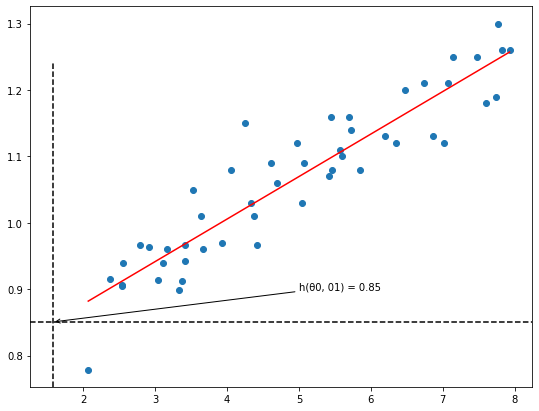

In [ ]:
# Elaborar o modelo
df = pd.DataFrame()

df['x'] = dados.values[:, 0]
df['y'] = dados.values[:, -1]

# Separando os dados em duas partes
x_values = df[['x']] # Entrada
y_values = df[['y']] # Saída

modelo = linear_model.LinearRegression()
modelo.fit(x_values, y_values)

print('y = ax + b')
print('a = %.2f => a inclinação da linha de tendência' % modelo.coef_[0][0])
print('b = %.2f => o ponto onde a linha de tendência atinge o eixo y' % modelo.intercept_[0])

plt.figure(1, figsize=(9,7))
plt.scatter(df.x, df.y)

fit = np.polyfit(df.x.values, df.y.values, 1)
fit_fn = np.poly1d(fit)

# Predição
entrada = 1.58
predicao = modelo.predict(np.array([[entrada]]))
txt = 'h(θ0, 01) = ' + str(round(predicao[0][0],2))
plt.annotate(txt, xy=(entrada, predicao), xytext=(5, 0.9),
             arrowprops=dict(arrowstyle='->'))

plt.axvline(x=entrada, ymin=0, ymax=predicao, ls='--',c='black')
plt.axhline(y=predicao, ls='--', c='black')
plt.plot(df.x.values, fit_fn(df.x.values), 'r')

plt.show()

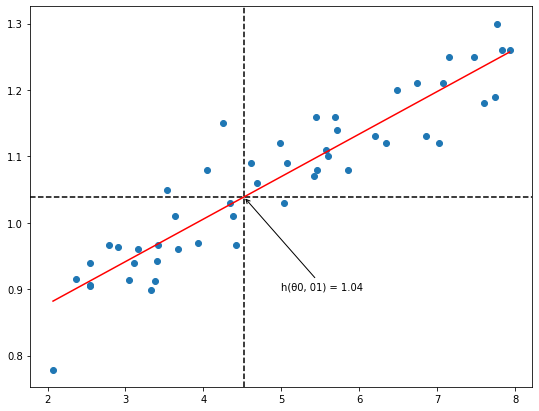

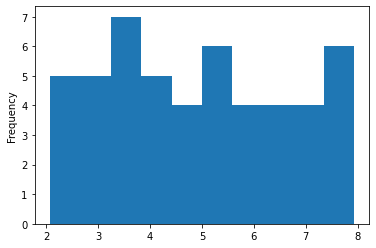

In [ ]:
df.x.plot(kind='hist')

# Biblioteca Stats Model

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://www.edsonmelo.com.br/dados_csv/dados_midias.csv')
df.shape

(200, 5)

In [ ]:
# Inspecionar o DataFrame
df.head()

,seq,tv,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Apagando colunas desnecessárias
df.drop(['seq'], axis=1)

,tv,radio,jornal,vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


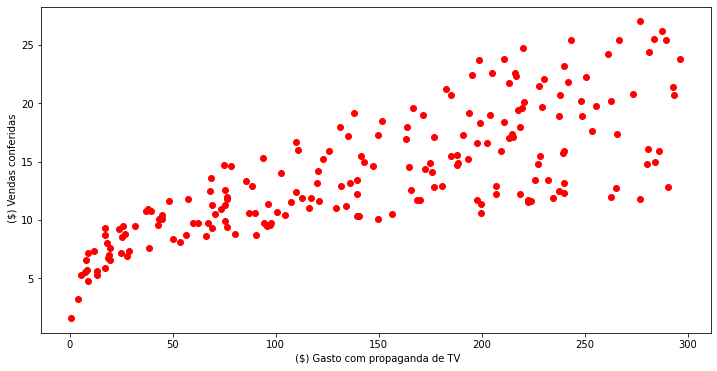

In [ ]:
# Plotar um gráfico dos dados brutos
# Relação de vendas por anúncio em TV
plt.figure(figsize=(12,6))
plt.scatter(
    df.tv,
    df.vendas,
    c='red'
)

plt.xlabel(' ($) Gasto com propaganda de TV')
plt.ylabel(' ($) Vendas conferidas')
plt.show()

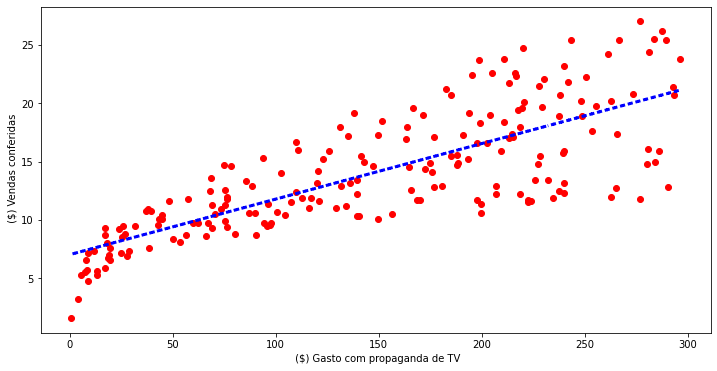

In [ ]:
# Traçando a linha de Regressão
X = df.tv.values.reshape(-1,1)
y = df.vendas.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

previsoes = reg.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(
    df.tv,
    df.vendas,
    c='red'
)

plt.plot(
    df.tv,
    previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(' ($) Gasto com propaganda de TV')
plt.ylabel(' ($) Vendas conferidas')
plt.show()

In [ ]:
# Avaliando o Modelo de Regressão
X = df.tv
y = df.vendas

X2 = sm.add_constant(X) # definição do modelo pela Stats Model
est = sm.OLS(y, X2) # estimador do modelo
est2 = est.fit() # treinar o modelo para avaliação de desempenho
print(est2.summary()) # mostrar a tabela com os resultados 

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.47e-42
Time:                        22:37:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
# A tabela acima indica que o R² apresenta um valor de 0.612, isso quer dizer
# que aproximadamente 61% do comportamento da variável "Vendas" é explicado
# pela variavel "Tv"

# Obs. 1: Hipótese nula é a proposição de que não há efeito ou relação entre
# fenômenos (variáveis) ou populações.

# Analisando o p-value na tabela, percebe-se que o seu valor é aproximado de zero.
# Assim, foi enconberto pelo arredondamento e isso nos faz "rejeitar" a
# hipótese nula.

# Obs. 2: Um p-value < 0,05 (5%) significa que a hipótese nula é falsa

# Regressão Linear Múltipla

In [ ]:
df.head()

,seq,tv,radio,jornal,vendas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# importar as bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as smimport
import numpy as np

# Selecionar todas as colunas para o modelo
X = np.column_stack((df.tv, df.radio, df.jornal)) # Variáveis independentes

y = df.vendas # Variável dependente

In [ ]:
# Analisando o modelo
X2 = sm.add_constant(X) # definição do modelo pela Stats Model
est = sm.OLS(y, X2) # estimador do modelo
est2 = est.fit() # treinar o modelo para avaliação de desempenho
print(est2.summary()) # mostrar a tabela com os resultados do modelo

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.58e-96
Time:                        23:10:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
# Observe que agora que foram utilizadas três variáveis, temos um modelo bem
# melhor. Isso porque percebemos que aproximadamente 90% dos resultados em
# vendas são explicados pelas variáveis.

# A variável x3 (jornal) possui um p-value muito alto, ou seja, não influencia
# no modelo (hipótese nula é verdadeira).

# Observando o feste (F-Statistic), podemos verificar quq a amostra tem alta
# variância, assim pode ser explicada pelo número pequeno de observações.

# Atividade 
Utilizando o dataset "PETR4.csv", aplicar um modelo de Regressão Linear sobre os dados e apresentar uma interpretação deles.

Exibir os dados da regeressão em gráficos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/PETR4.SA.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [ ]:
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,27.500000,27.580000,26.91,27.000000,20.966322,22738500
1,27.010000,27.059999,26.40,26.900000,20.888672,30936600
2,26.680000,27.350000,26.58,27.219999,21.137163,24306800
3,27.200001,27.459999,27.01,27.110001,21.051748,24328800
4,27.020000,27.180000,26.73,26.730000,20.756662,17453800


In [ ]:
# separando os dados

dados = pd.DataFrame()
dados['x'] = df.values[:, 0]
dados['y'] = df.values[:, -1]

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(x_values, y_values)

LinearRegression()

In [ ]:
X = np.column_stack((df.Open, df.High, df.Low, df.Close, df['Adj Close']))
y = df.Volume

X2 = sm.add_constant(X) # definição do modelo pela Stats Model
est = sm.OLS(y, X2) # estimador do modelo
est2 = est.fit() # treinar o modelo para avaliação de desempenho
print(est2.summary()) # mostrar a tabela com os resultados do modelo

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     37.87
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.19e-28
Time:                        00:49:30   Log-Likelihood:                -4556.0
No. Observations:                 249   AIC:                             9124.
Df Residuals:                     243   BIC:                             9145.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.904e+07   2.33e+07      2.534      0.0

In [ ]:
X = np.column_stack((df.High, df.Low))
y = df.Volume

X2 = sm.add_constant(X) # definição do modelo pela Stats Model
est = sm.OLS(y, X2) # estimador do modelo
est2 = est.fit() # treinar o modelo para avaliação de desempenho
print(est2.summary()) # mostrar a tabela com os resultados do modelo

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     87.68
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.78e-29
Time:                        00:50:18   Log-Likelihood:                -4560.8
No. Observations:                 249   AIC:                             9128.
Df Residuals:                     246   BIC:                             9138.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.565e+07   1.64e+07      5.217      0.0